# Project Code : PRCP-1025-Flight Price Prediction

# Business Case:
####   Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

# 1 . Domain Analysis

*  Airline:This column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.

* Date_of_Journey: This column will let us know about the date on which the passenger's journey will start.

* Source: This column holds the name of the place to where passenger's journey will start.
* Destination: This column holds the name of the place to where passengers wanted to trvel.
* Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.

* Dep_Time: The scheduled time when the flight is expected to leave and begin its journey.
* Arrival_Time: Arrival time is when the passenger will reach his/her destination.
* Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
* Total_Stops: This will let us know in how many places flightd will stop there for the flight in the whole journey.
* Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
* Price: Price of the flight for a  complete journey including all expenses before onboarding.

# 2 . Python Implementation

In [3]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('Flight_fare.csv')

In [ ]:
df

# 3 . Basic Checks

In [490]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [491]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [492]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [493]:
df.shape

(10683, 11)

In [494]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [495]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [496]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# 4 . Exploratory Data Analysis (EDA)

### ( i ) . Univariate Analysis

#### MOST PREFERRED AIRLINE

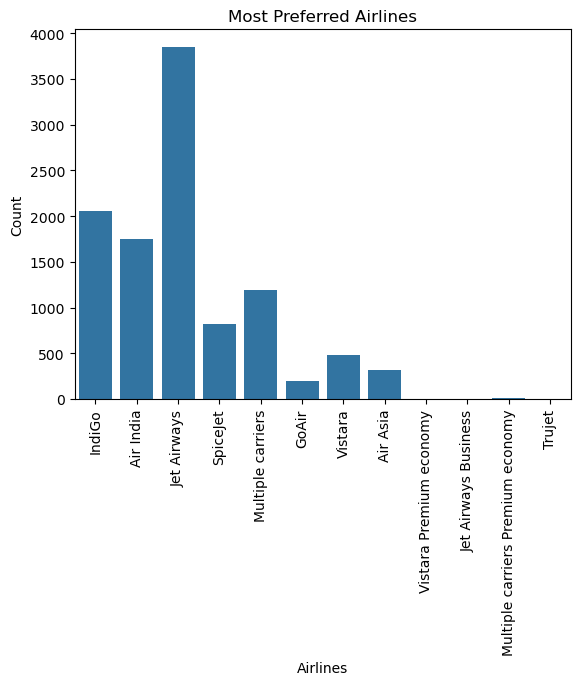

In [500]:
sns.countplot(x = 'Airline', data = df)

plt.title('Most Preferred Airlines', fontsize = 12, color = 'black')
plt.xlabel('Airlines', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

**Observation:**
- Jet Airways is the most preferred airline with approximately 3800 counts.
- Second most preferred Airline is Indigo with nearly 2100 counts.
- Jet Airways Business, Vistara Premium Economy, Multiple Carriers Premium economy and Trujet are the least preferred airlines.

#### MOST PREFERRED SOURCE

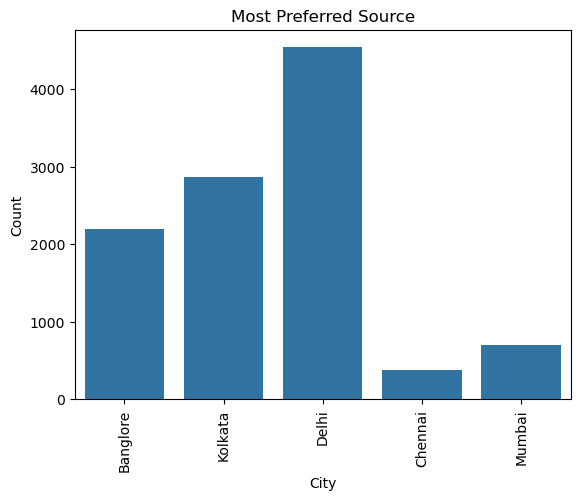

In [503]:
sns.countplot(x = 'Source', data = df)

plt.title('Most Preferred Source', fontsize = 12, color = 'black')
plt.xlabel('City', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

**Observation:**
- From the Plot, it can be seen that the Most desired Source (Departure station), is Delhi with a count of almost 4500 passengers. 
- And the least preferred Source station is Chennai with a count of nearly 300 passengers.

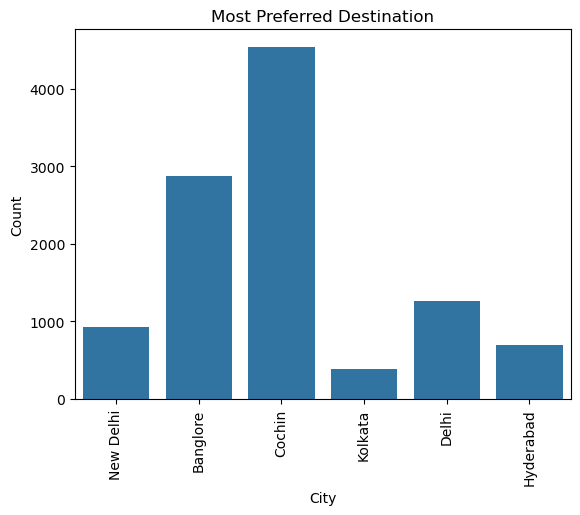

In [505]:
sns.countplot(x = 'Destination', data = df)

plt.title('Most Preferred Destination', fontsize = 12, color = 'black')
plt.xlabel('City', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

**Observation:**
- From the plot it can be inferred that the Most Preferred Destination is Cochin city with a count of almost 4500 passengers. 
- And Kolkata is the least preferred city among all with nearly 400 passengers.

#### TOP 10 MOST PREFERRED ROUTE FOR TRAVEL

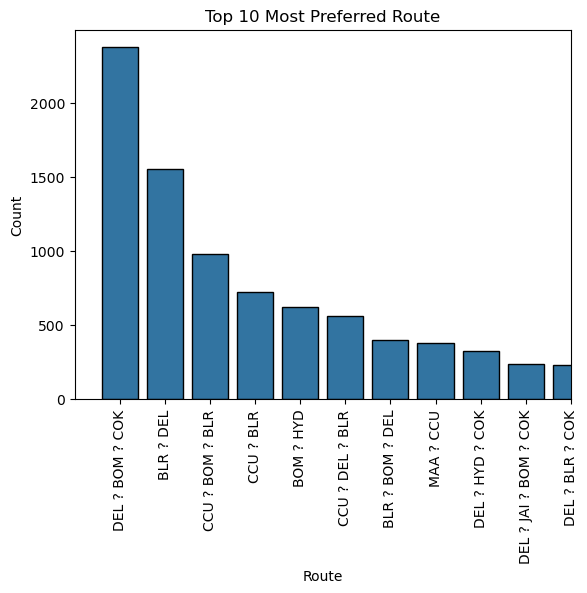

In [508]:
sns.countplot(x = 'Route', data = df, order = df['Route'].value_counts().index, ec = 'black')

plt.title('Top 10 Most Preferred Route', fontsize = 12, color = 'black')
plt.xlabel('Route', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)

plt.show()

**Observation:**
- Most Preferred Route is DEL → BOM → COK with a count of nearly 3000 followed by BLR → DEL

#### MOST NUMBER OF TOTAL_STOPS PREFERRED

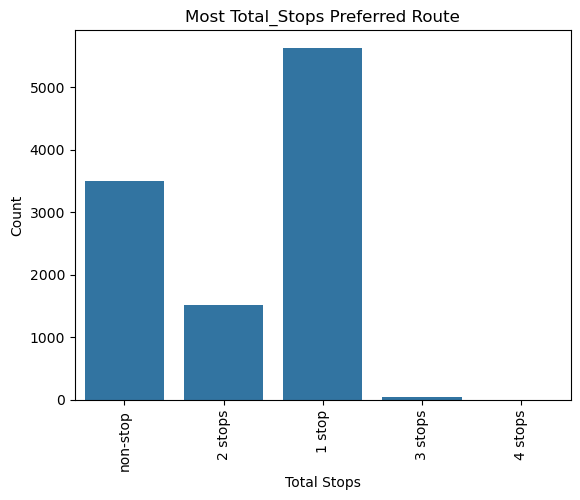

In [511]:
sns.countplot(x = 'Total_Stops', data = df)

plt.title('Most Total_Stops Preferred Route', fontsize = 12, color = 'black')
plt.xlabel('Total Stops', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

**Observation:**
- From the plot, we can see that passengers preferred airlines route with 1 stop most with a count of almost 5800, followed by non-stop airline route.
- Passengers avoid 3 stops or 4 stops airline route.

#### MOST TRAVELLED DATE

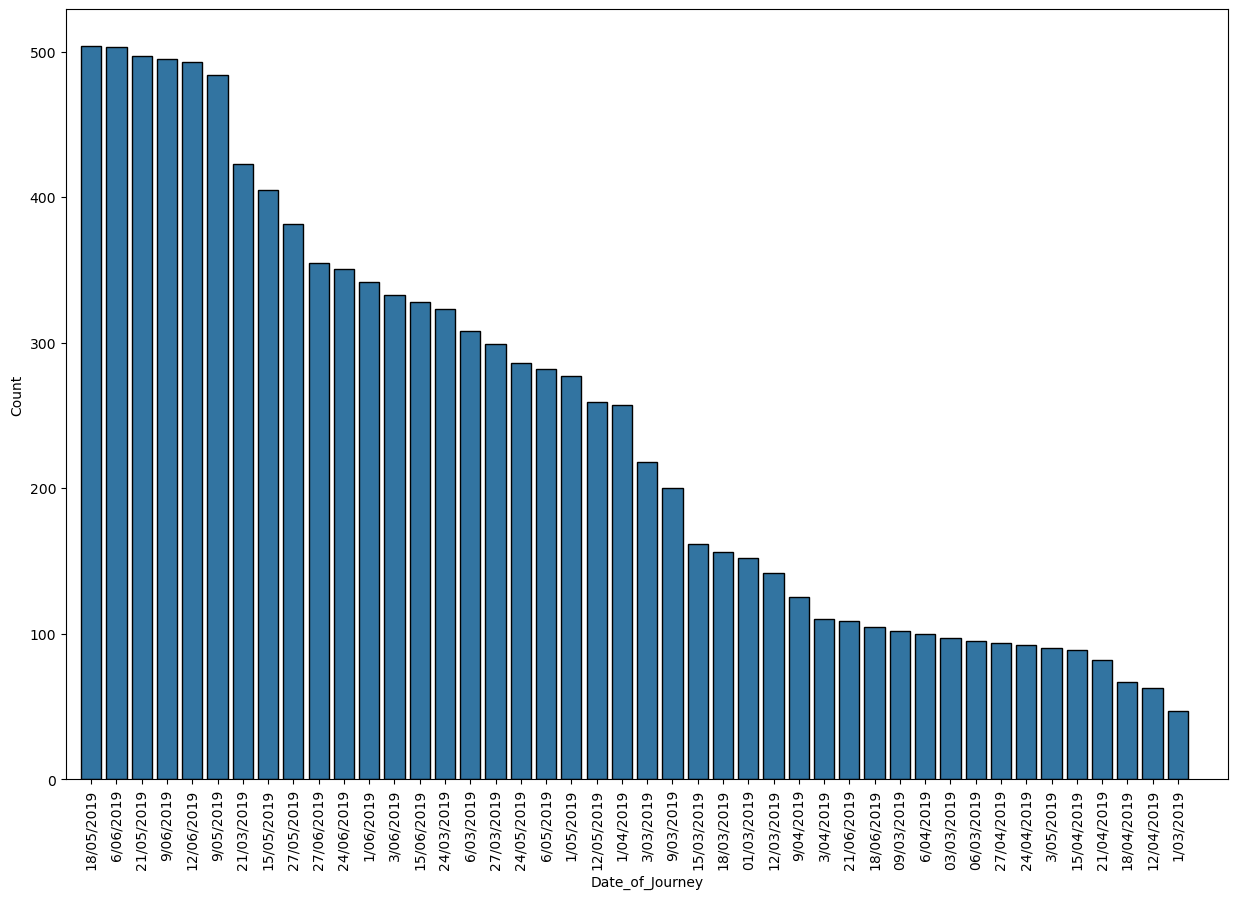

In [514]:
plt.figure(figsize = (15, 10))

# Create a countplot to visualize the frequency of flights on different dates
sns.countplot(x = 'Date_of_Journey', data = df, order = df['Date_of_Journey'].value_counts().index,ec='black')

# Set x-axis and y-axis labels
plt.xlabel('Date_of_Journey', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

# Rotate x-axis labels for better readability
plt.xticks(rotation = 90)

# Show the plot
plt.gca().invert_xaxis()  # Invert the x-axis to display dates in descending order

# Limit the number of displayed dates on the x-axis if needed
plt.xlim(-1, 45)

# Show the plot
plt.show()

**Observation:**
- The number of passengers are highter on 18-05-2019 followed by 06-06-2019.
- The least number of passengers travelled was on 01-03-2019.

### ( ii ) . Bivariate Analysis

#### PRICE VARIATIONS BETWEEN AIRLINES

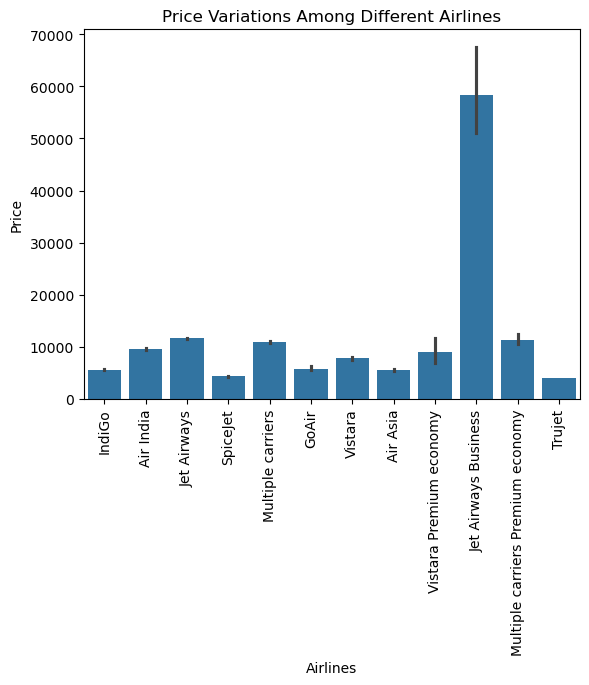

In [518]:
sns.barplot(x = 'Airline', y = 'Price', data = df)

plt.title('Price Variations Among Different Airlines', fontsize = 12, color = 'black')
plt.xlabel('Airlines', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

**Observation:**
- Based on the plot, we can see that Jet Airways Business is the most expensive of all. Also, it is the least popular airline, as we observed in Airline Count Plot. This may be because of high price of the ticket.
- Jet Airways is the 2nd most expensive.
- Trujet is the least expensive airline.

#### RELATION BETWEEN PRICE AND TOTAL NUMBER OF STOPS

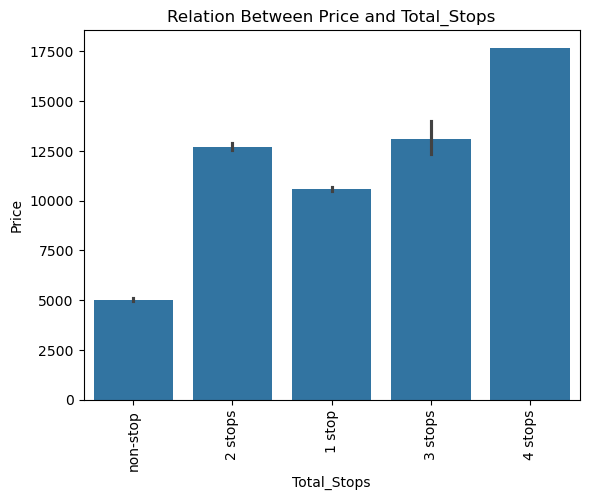

In [521]:
sns.barplot(x ='Total_Stops', y = 'Price', data = df)

plt.title('Relation Between Price and Total_Stops', fontsize = 12, color = 'black')
plt.xlabel('Total_Stops', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

**Observation:**
- The Price of Airline tickets with most number of stops are highest with rate nearly 17500.
- The least price is for the Airlines with no stops.

#### RELATION BETWEEN PRICE OF TICKETS AND THE SOURCE CITY

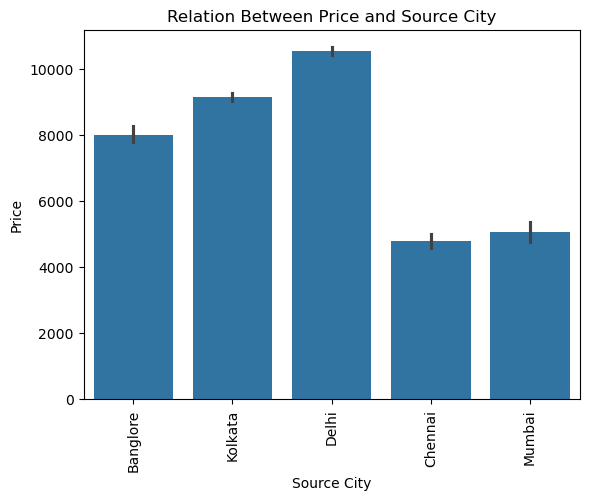

In [524]:
sns.barplot(x = 'Source', y = 'Price', data = df)

plt.title('Relation Between Price and Source City', fontsize = 12, color = 'black')
plt.xlabel('Source City', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

**Observation:**
- The Price of Airline tickets is highest if the flight start from Delhi. Price of tickets is as high as 11000.
- The least price of ticket is from Chennai as source city. Price is as low as 4500.

#### RELATION BETWEEN PRICE OF TICKETS AND THE DESTINATION CITY

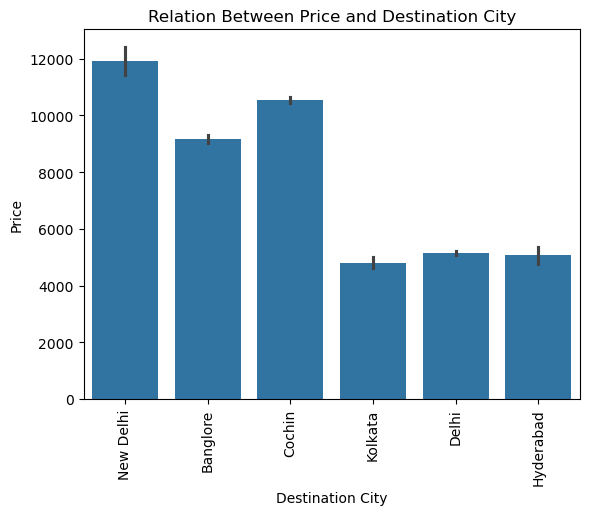

In [527]:
sns.barplot(x = 'Destination', y = 'Price', data = df)

plt.title('Relation Between Price and Destination City', fontsize = 12, color = 'black')
plt.xlabel('Destination City', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

**Observation:**
- The Price of Airline tickets is highest if the flight destination is New Delhi. Price of tickets is as high as 12000.
- The least price of ticket is to Kolkata as destination city. Price is as low as 5000. 

#### RELATION BETWEEN PRICE OF TICKETS AND THE ADDITIONAL INFORMATION PROVIDED

In [530]:
# Listing the Unique values

df.Additional_Info = list(df.Additional_Info.str.lower())
df.Additional_Info.unique() 

array(['no info', 'in-flight meal not included',
       'no check-in baggage included', '1 short layover',
       '1 long layover', 'change airports', 'business class',
       'red-eye flight', '2 long layover'], dtype=object)

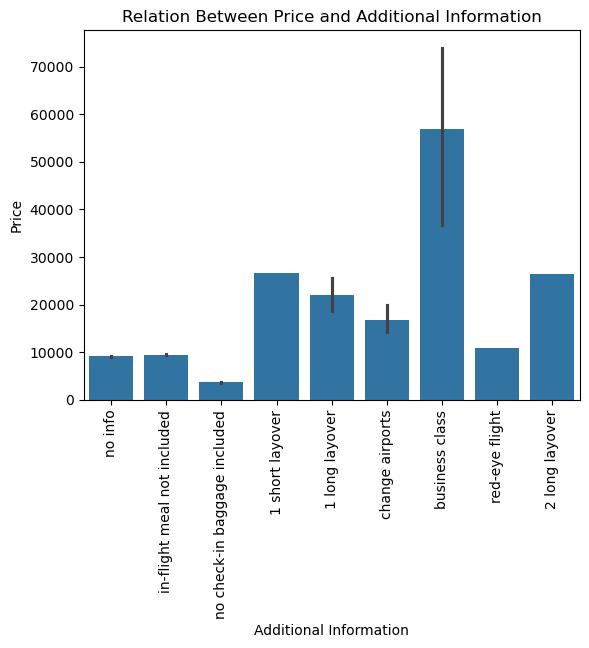

In [531]:
sns.barplot(x = 'Additional_Info', y = 'Price', data = df)

plt.title('Relation Between Price and Additional Information', fontsize = 12, color = 'black')
plt.xlabel('Additional Information', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

**Observation:**
- The Price of Airline tickets is highest of Business Class category. This is followed by 1 Short Layover and 2 Short Layover.
- the Price is least for No Check-in Baggage Included.

#### COMPARISON OF PRICES ON WEEKDAYS AND ON WEEKENDS

In [534]:
days_df = df[['Airline', 'Date_of_Journey', 'Price']]
days_df

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302
...,...,...,...
10678,Air Asia,9/04/2019,4107
10679,Air India,27/04/2019,4145
10680,Jet Airways,27/04/2019,7229
10681,Vistara,01/03/2019,12648


In [535]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'], format = '%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day:1 if day == 'Sunday' else 0)
days_df

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0
...,...,...,...,...,...
10678,Air Asia,2019-04-09,4107,Tuesday,0
10679,Air India,2019-04-27,4145,Saturday,0
10680,Jet Airways,2019-04-27,7229,Saturday,0
10681,Vistara,2019-03-01,12648,Friday,0


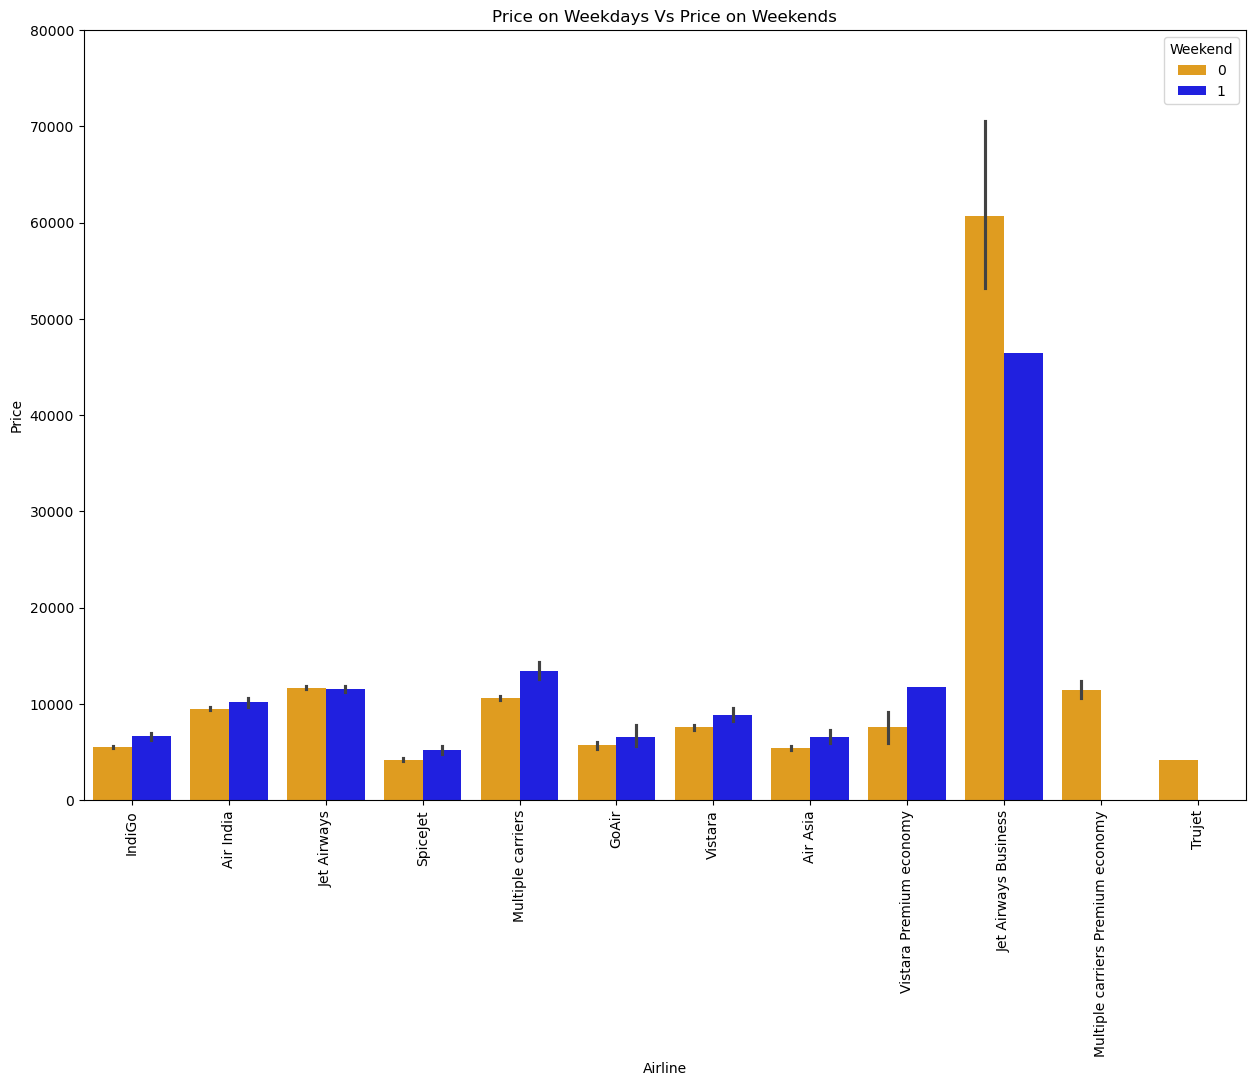

In [536]:
# Creating a subplot with a suitable size

plt.subplots(figsize = (15, 10))

# Mapping the 'Weekend' column to colors (1 to 'blue' and 0 to 'orange')

color_palette = {1: 'blue', 0: 'orange'}

# Creating a barplot using Seaborn, mapping 'Weekend' to colors

sns.barplot(x = 'Airline', data = days_df, y = 'Price', hue = 'Weekend', palette = color_palette)

plt.title('Price on Weekdays Vs Price on Weekends', fontsize = 12, color = 'black')
plt.xlabel('Airline', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation=90)

# Setting the y-axis limit

plt.ylim(0, 80000)

plt.show()

**Observation:**
- From the above plot, we can see that Jet Airways Business, Multiple Carriers Premium Economy, and Trujet Airlines have higher ticket prices during Weekdays than on Weekends.
- Other Airlines have higher ticket rates on Weekends than on Weekdays.
- Hence, it can be inferred that ticket prices for most of the Airlines are higher during Weekends than on the Weekdays.

# 5 . Data Preprocessing 

In [539]:
# Extract day and month from Date_of_Journey
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [540]:
# Extract hour and minute from Dep_Time
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'], axis=1, inplace=True)

In [541]:
# find the hour and minute from Arrival_time
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [542]:
## Convert Duration to total minutes
def convert_duration(x):
    h, m = 0, 0
    if 'h' in x:
        h = int(x.split('h')[0].strip())
        x = x.split('h')[1]
    if 'm' in x:
        m = int(x.split('m')[0].strip())
    return h * 60 + m

df['Duration_mins'] = df['Duration'].apply(convert_duration)
df.drop(['Duration'], axis=1, inplace=True)

In [543]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,no info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,no info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,no info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,no info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,no info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,no info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,no info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,no info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR ? DEL,non-stop,no info,12648,1,3,11,30,14,10,160


In [544]:
# finiding the missing value 
missing_value = df.isnull().sum()
missing_value

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Dep_hour           0
Dep_minute         0
Arrival_hour       0
Arrival_minute     0
Duration_mins      0
dtype: int64

In [545]:
# To find which rows has a missing value 
missing_rows=df[df.isnull().any(axis=1)]
print(missing_rows)

        Airline Source Destination Route Total_Stops Additional_Info  Price  \
9039  Air India  Delhi      Cochin   NaN         NaN         no info   7480   

      Journey_day  Journey_month  Dep_hour  Dep_minute  Arrival_hour  \
9039            6              5         9          45             9   

      Arrival_minute  Duration_mins  
9039              25           1420  


In [546]:
# impute(fill)the value for categorical columns --> fill with most frequent value(mode).
df['Route'].fillna(df['Route'].mode()[0],inplace=True)     
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace=True)

In [547]:
# To check the missing value has clear or not 
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Dep_hour           0
Dep_minute         0
Arrival_hour       0
Arrival_minute     0
Duration_mins      0
dtype: int64

In [548]:
df.duplicated().sum() # to check the duplicated in DataFrame.

222

In [549]:
df=df.drop_duplicates() # to drop the duplicates.

In [550]:
# Encoding

In [551]:
encoder=LabelEncoder()
encoder=OrdinalEncoder()

In [552]:
# Coverting the labels into a numeric form using Label Encoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [553]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins
0,3,0,5,18,4,7,3897,24,3,22,20,1,10,170
1,1,3,0,84,1,7,7662,1,5,5,50,13,15,445
2,4,2,1,118,1,7,13882,9,6,9,25,4,25,1140
3,3,3,0,91,0,7,6218,12,5,18,5,23,30,325
4,3,0,5,29,0,7,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,7,4107,9,4,19,55,22,25,150
10679,1,3,0,64,4,7,4145,27,4,20,45,23,20,155
10680,4,0,2,18,4,7,7229,27,4,8,20,11,20,180
10681,10,0,5,18,4,7,12648,1,3,11,30,14,10,160


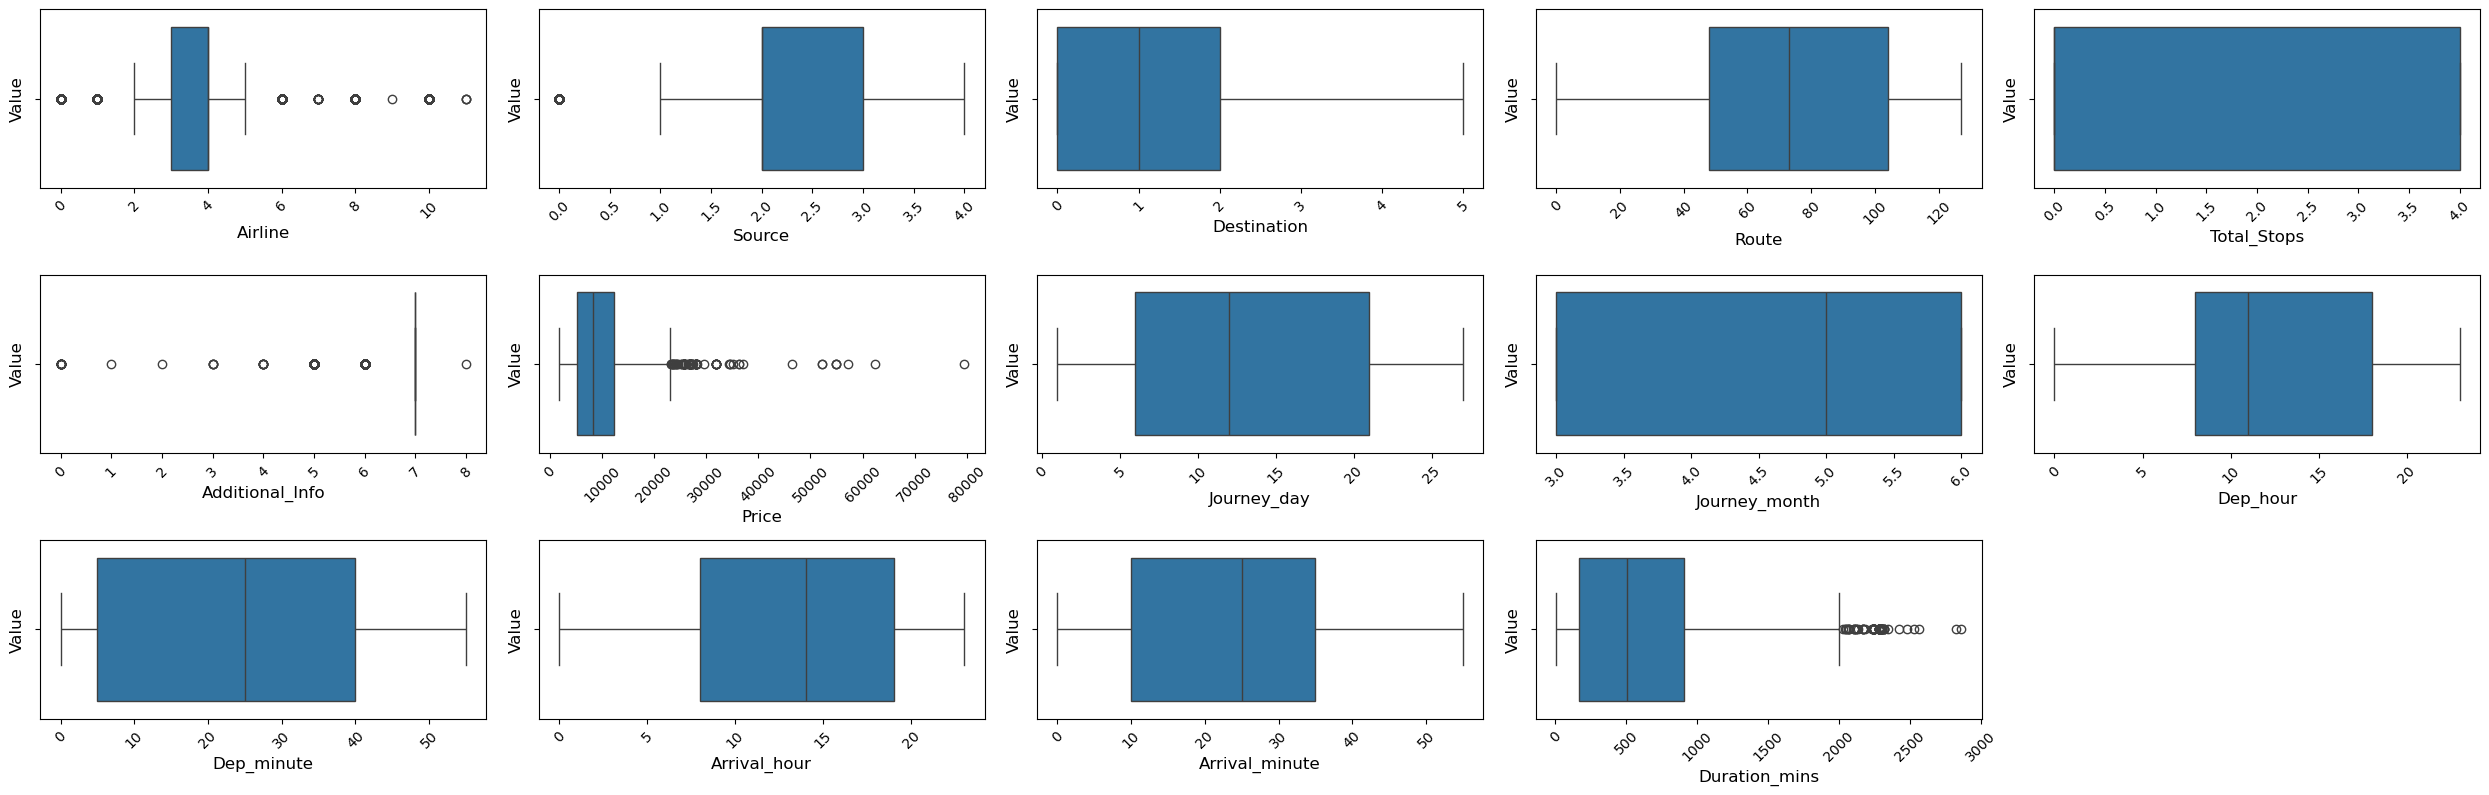

In [554]:
# creating the boxplot to check for an outliers :

plt.figure(figsize=(25, 18), facecolor='white')  # Bigger figure for 14 plots

plotnumber = 1

# Loop through all columns
for column in df.columns:
    if plotnumber <= 14:
        ax = plt.subplot(7, 5, plotnumber)  # Grid of 5 rows × 3 columns (at least 15 spaces)
        sns.boxplot(x=df[column])
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Value', fontsize=12)
        plt.xticks(rotation=45)
        plotnumber += 1

plt.tight_layout()
plt.show()


<Axes: xlabel='Airline'>

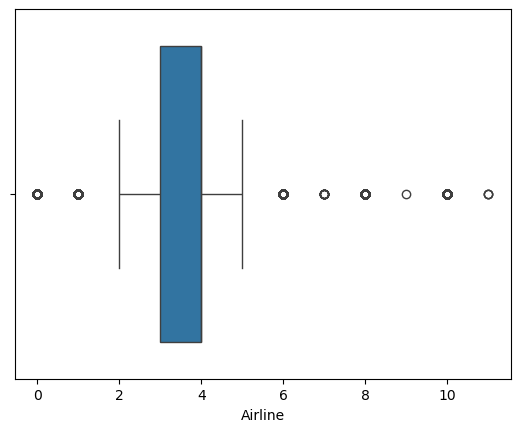

In [555]:
sns.boxplot(x=df.Airline)

In [556]:
Q1=df['Airline'].quantile(0.25)
Q1

3.0

In [557]:
Q3=df['Airline'].quantile(0.75)
Q3

4.0

In [558]:
IQR=Q3-Q1
IQR

1.0

In [559]:
lower_bound=Q1-(1.5*IQR)
lower_bound 

1.5

In [560]:
upper_bound=Q3+(1.5*IQR)
upper_bound 

5.5

In [561]:
df.loc[df['Airline']<lower_bound]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins
1,1,3,0,84,1,7,7662,1,5,5,50,13,15,445
10,1,2,1,103,0,7,8907,1,6,9,45,23,0,795
12,1,1,4,127,4,7,4667,24,6,11,40,13,55,135
15,1,2,1,97,1,7,14011,3,3,16,40,19,15,1595
18,1,2,1,105,1,7,13381,12,6,20,15,19,15,1380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10671,1,4,3,48,4,7,3100,6,6,21,5,22,25,80
10675,1,4,3,48,4,7,3100,9,6,6,20,7,40,80
10678,0,3,0,64,4,7,4107,9,4,19,55,22,25,150
10679,1,3,0,64,4,7,4145,27,4,20,45,23,20,155


In [562]:
len(df.loc[df['Airline']>upper_bound])

2505

In [563]:
len(df.loc[df['Airline']>upper_bound])/len(df*100)

0.23946085460281044

In [564]:
df.loc[df['Airline']>upper_bound,'Airline']=df['Airline'].median()

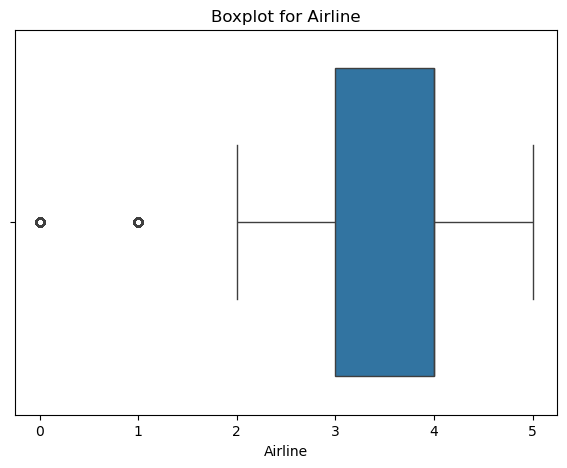

In [565]:
#Outliers handled.
plt.figure(figsize=(7, 5))
sns.boxplot(x=df.Airline)
plt.title('Boxplot for Airline')
plt.show()

<Axes: xlabel='Price'>

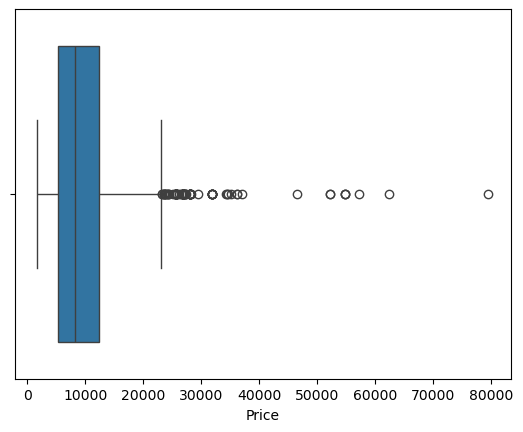

In [566]:
sns.boxplot(x=df.Price)

In [567]:
Q1=df['Price'].quantile(0.25)
Q1

5224.0

In [568]:
Q3=df['Price'].quantile(0.75)
Q3

12346.0

In [569]:
IQR=Q3-Q1
IQR

7122.0

In [570]:
lower_bound=Q1-(1.5*IQR)
lower_bound 

-5459.0

In [571]:
upper_bound=Q3+(1.5*IQR)
upper_bound      

23029.0

In [572]:
df.loc[df['Price']<lower_bound]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins


In [573]:
df.loc[df['Price']>upper_bound]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins
123,1,2,1,104,0,7,27430,1,3,23,0,19,15,1215
396,4,2,1,104,0,7,36983,1,3,12,50,19,15,385
486,4,0,5,5,0,7,26890,1,3,8,55,15,15,380
510,4,0,5,5,0,7,26890,1,3,7,0,12,25,325
597,1,4,3,51,1,7,25139,6,3,9,40,15,15,1775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,38,1,7,24210,6,3,19,50,16,50,1260
10364,5,0,5,28,0,3,57209,1,3,9,45,14,25,280
10383,4,0,5,5,0,7,26890,1,3,7,0,5,5,1325
10439,4,0,5,5,0,7,31825,1,3,18,40,9,0,860


In [574]:
len(df.loc[df['Price']>upper_bound ])/len(df*100)

0.00898575661982602

In [575]:
df.loc[df['Price']>upper_bound,'Price']=df['Price'].median()

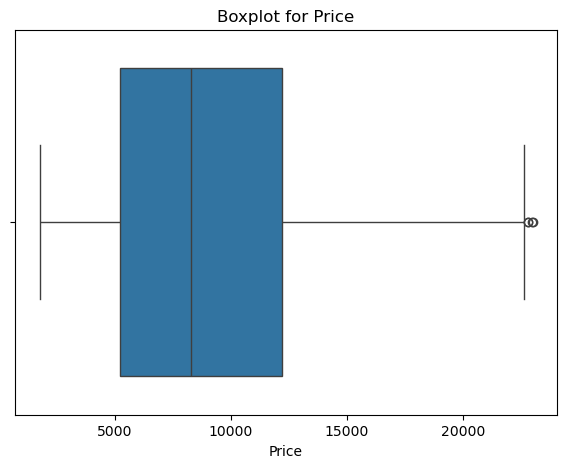

In [576]:
#Outliers handled.
plt.figure(figsize=(7,5))
sns.boxplot(x=df.Price)
plt.title('Boxplot for Price')
plt.show()

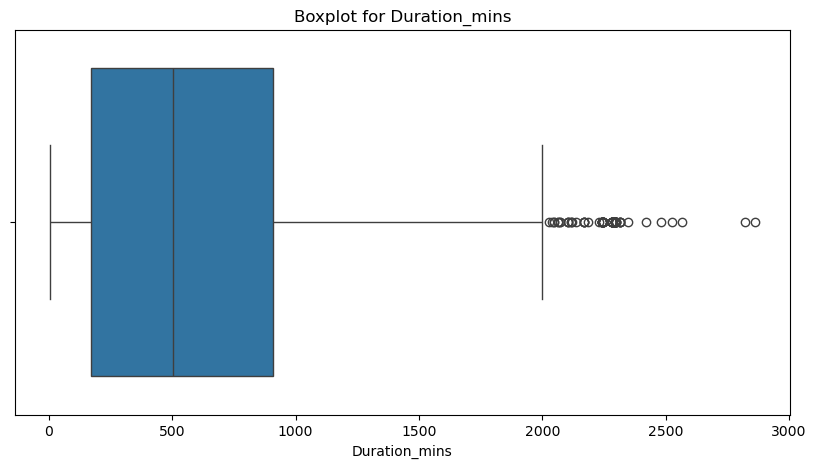

In [577]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Duration_mins)
plt.title('Boxplot for Duration_mins')
plt.show()

In [578]:
Q1=df['Duration_mins'].quantile(0.25)
Q1

170.0

In [579]:
Q3=df['Duration_mins'].quantile(0.75)
Q3

910.0

In [580]:
IQR=Q3-Q1
IQR

740.0

In [581]:
lower_bound=Q1-(1.5*IQR)
lower_bound

-940.0

In [582]:
upper_bound=Q3+(1.5*IQR)
upper_bound 

2020.0

In [583]:
df.loc[df['Duration_mins']<lower_bound]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins


In [584]:
df.loc[df['Duration_mins']>upper_bound]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins
226,4,2,1,113,1,7,18799,3,3,5,25,18,50,2245
470,4,2,1,126,1,7,13082,21,3,18,20,4,25,2045
553,1,2,1,97,1,7,10598,9,3,5,0,19,15,2295
919,1,3,0,63,2,7,10991,12,5,12,0,23,15,2115
925,4,2,1,107,1,7,19907,6,3,16,50,4,25,2135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,1,2,1,102,1,7,13748,3,3,5,55,19,15,2240
10020,1,2,1,97,1,7,9653,9,5,5,0,19,15,2295
10326,1,0,5,16,1,7,11791,3,3,5,50,22,10,2420
10456,4,2,1,97,1,7,20694,6,3,19,10,18,50,2860


In [585]:
len(df.loc[df['Duration_mins']>upper_bound])/len(df*100)

0.007169486664754803

In [586]:
df.loc[df['Duration_mins']>upper_bound,'Duration_mins']=df['Duration_mins'].median()

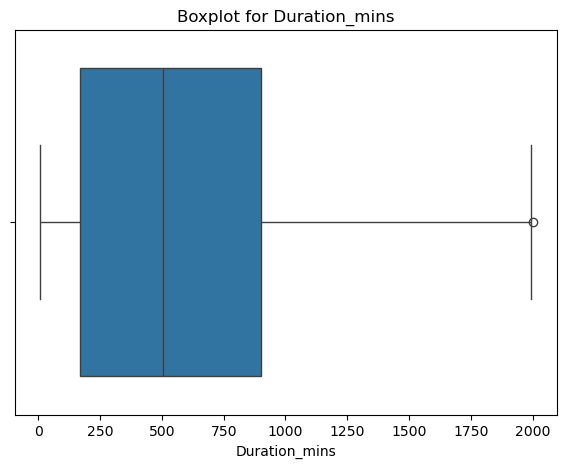

In [587]:
#Outliers handled.
plt.figure(figsize=(7, 5))
sns.boxplot(x=df.Duration_mins)
plt.title('Boxplot for Duration_mins')
plt.show()

In [588]:
# Scalling

In [589]:
x = df.drop('Price', axis=1) # Independent features (all columns except 'Price')
y = df['Price'] # Dependent feature (target variable)

In [1]:
scaler = StandardScaler() # Suppose you already have encoded features in 'X'
x_scaled = scaler.fit_transform(x) # Fit and transform only numerical columns (ideally after selecting them)

# Convert back to DataFrame
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

NameError: name 'StandardScaler' is not defined

In [591]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins
0,3,0,5,18,4,7,3897,24,3,22,20,1,10,170
1,1,3,0,84,1,7,7662,1,5,5,50,13,15,445
2,4,2,1,118,1,7,13882,9,6,9,25,4,25,1140
3,3,3,0,91,0,7,6218,12,5,18,5,23,30,325
4,3,0,5,29,0,7,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,7,4107,9,4,19,55,22,25,150
10679,1,3,0,64,4,7,4145,27,4,20,45,23,20,155
10680,4,0,2,18,4,7,7229,27,4,8,20,11,20,180
10681,4,0,5,18,4,7,12648,1,3,11,30,14,10,160


# 6 . Feature Selection

In [593]:
# Train-Test Splitting
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [594]:
# Checking Correlation

In [595]:
df.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins
Airline,1.000000,0.007688,-0.011862,0.035980,-0.130996,-0.320170,0.169972,0.020338,0.050986,0.003400,-0.062146,-0.034657,-0.134685,-0.028160
Source,0.007688,1.000000,-0.589713,0.403587,-0.222515,-0.015212,0.074324,0.005440,0.180696,0.060771,-0.056734,0.027701,0.021073,0.170424
Destination,-0.011862,-0.589713,1.000000,-0.457216,0.333714,0.011004,-0.165597,-0.040998,-0.361792,-0.074863,0.128728,-0.043793,0.016839,-0.264368
Route,0.035980,0.403587,-0.457216,1.000000,-0.435871,0.051149,0.240700,0.079704,0.236358,-0.074781,-0.071013,0.021043,-0.174527,0.268953
Total_Stops,-0.130996,-0.222515,0.333714,-0.435871,1.000000,0.146193,-0.620871,0.030346,-0.021046,0.039929,0.049358,-0.098865,0.177065,-0.630513
Additional_Info,-0.320170,-0.015212,0.011004,0.051149,0.146193,1.000000,-0.031375,-0.012895,-0.043172,-0.056370,-0.022718,0.026803,0.042353,-0.167518
Price,0.169972,0.074324,-0.165597,0.240700,-0.620871,-0.031375,1.000000,-0.121146,-0.058871,0.005219,-0.053577,0.045809,-0.097278,0.564368
Journey_day,0.020338,0.005440,-0.040998,0.079704,0.030346,-0.012895,-0.121146,1.000000,-0.038363,-0.003387,-0.004928,-0.002428,-0.015125,-0.029441
Journey_month,0.050986,0.180696,-0.361792,0.236358,-0.021046,-0.043172,-0.058871,-0.038363,1.000000,0.040874,-0.062723,0.000902,-0.099581,0.027170
Dep_hour,0.003400,0.060771,-0.074863,-0.074781,0.039929,-0.056370,0.005219,-0.003387,0.040874,1.000000,-0.015032,-0.003222,0.073340,0.023712


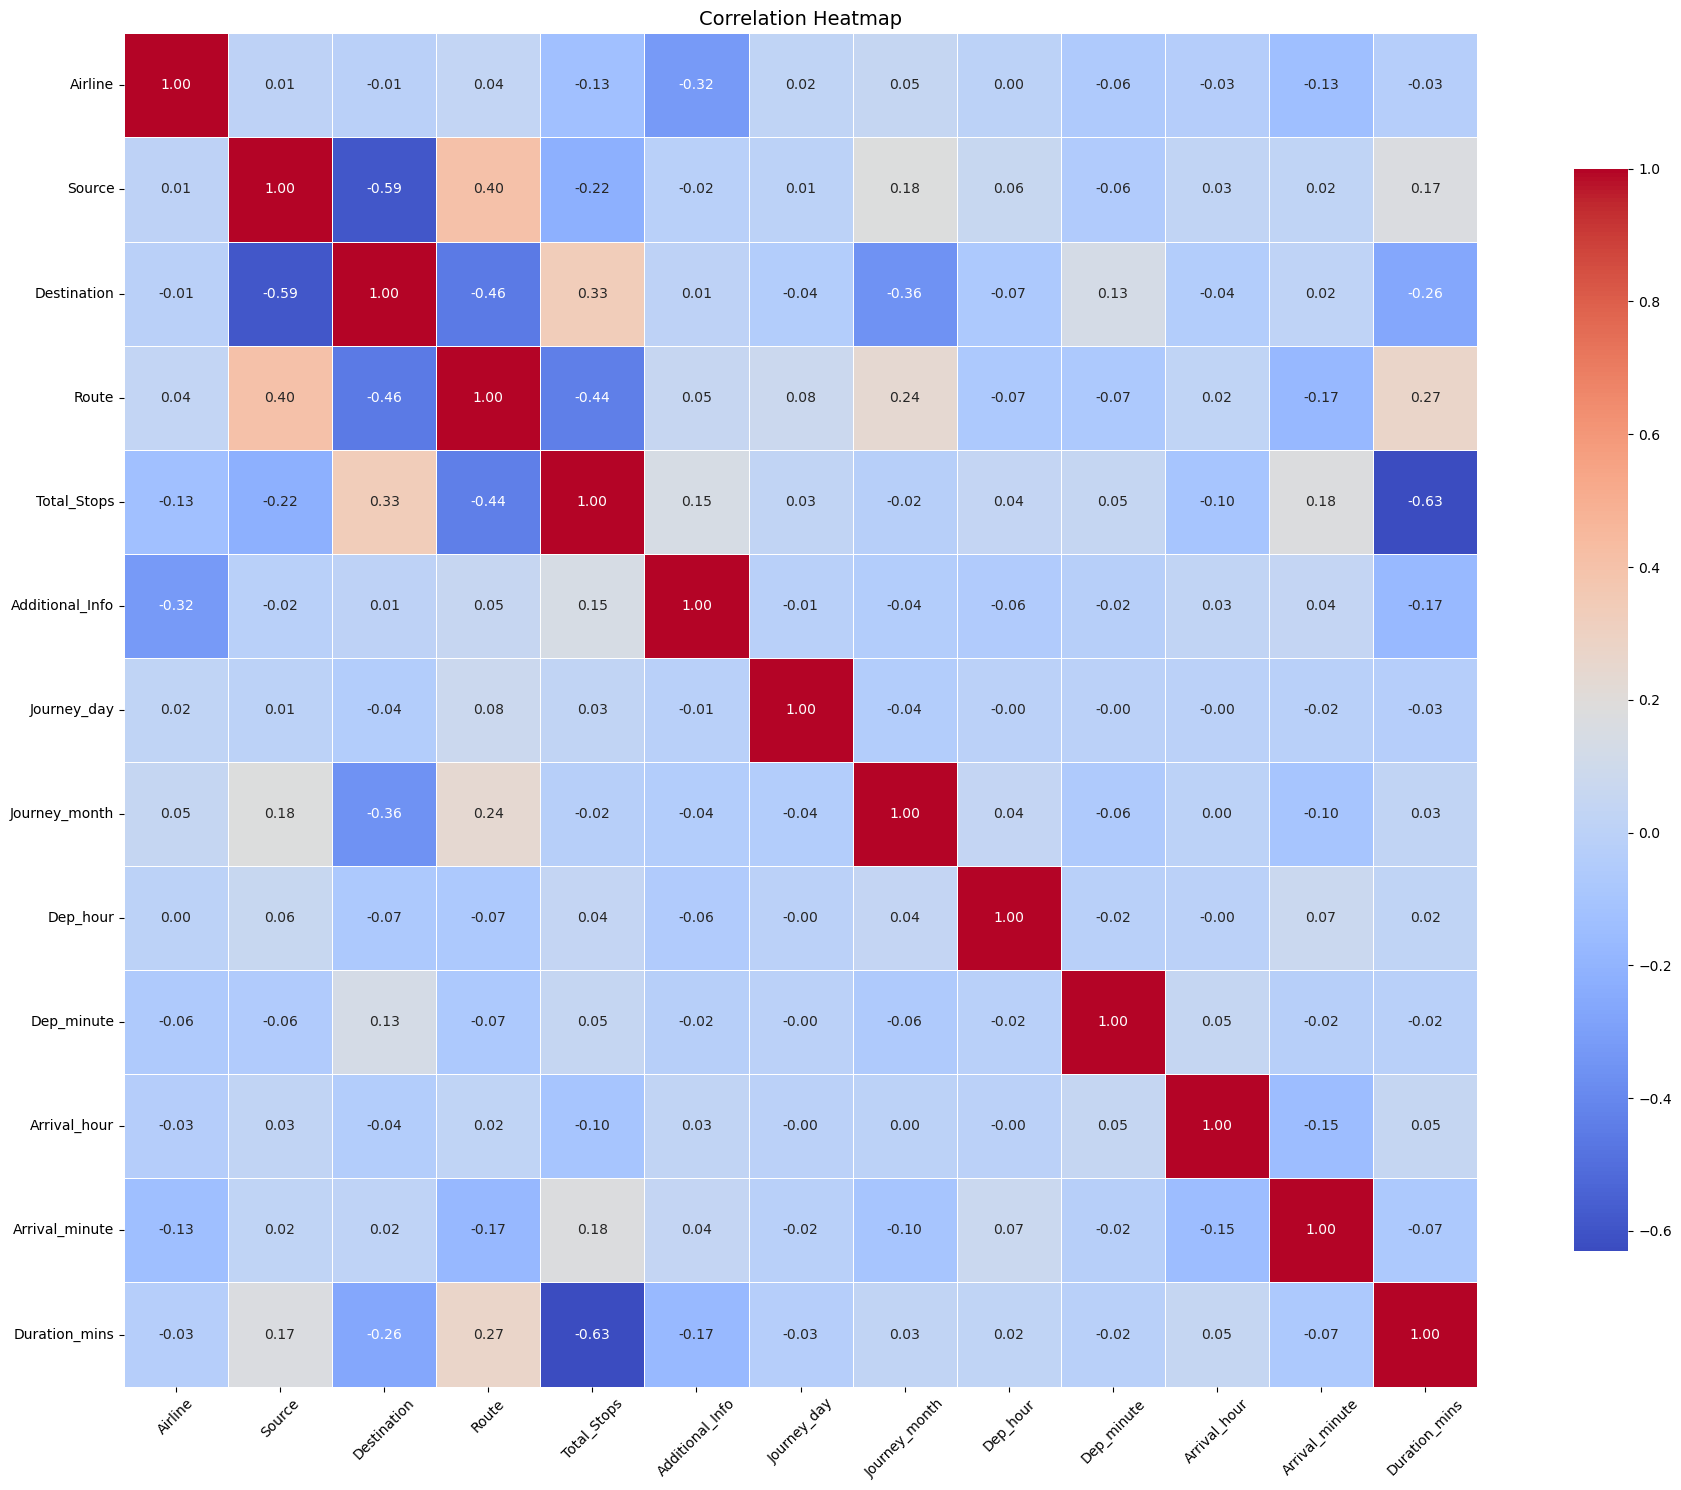

In [596]:
plt.figure(figsize=(20, 15))  # Adjust the figure size (width, height)
sns.heatmap(df.drop('Price',axis=1).corr(), 
            annot=True,          # Show correlation values
            fmt=".2f",           # Format float to 2 decimal places
            cmap="coolwarm",     # Use a clearer color map
            square=True,         # Make each cell square-shaped
            linewidths=0.5,      # Add lines between boxes
            cbar_kws={"shrink": .8})  # Shrink color bar for clarity

plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

# Insights  
The value -0.63 represents a moderate to strong negative correlation. Negative correlation means:As one variable increases, the other tends to decrease.
##### so, –0.63 correlation implies:
Flights with more stops tend to have slightly lower flying durations, and flights with fewer stops (like non-stop flights) may have longer continuous durations.

# 7 . Model Creation

### Linear Regression

In [600]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [601]:
y_predict=LR.predict(x_test)
y_predict

array([14534.89260493,  5974.48249213,  5172.56248153, ...,
       12431.99043104, 11162.65066789, 10875.08643549])

In [602]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [603]:
MSE=mean_squared_error(y_test,y_predict)
MSE

8308131.74672432

In [604]:
RMSE=np.sqrt(MSE)
RMSE

2882.382997924516

In [605]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

2279.3354446178278

In [606]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.4933246926260142

### K Nearest Neighbors (KNN)

In [608]:
from sklearn.neighbors import KNeighborsRegressor

In [609]:
# finding optimal value for k to determine how many neighbors to find

In [610]:
rmse_val=[]
for i in range (1,11):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred_i=model.predict(x_test)
    error=np.sqrt(mean_squared_error(y_test,y_pred_i))
    rmse_val.append(error)
    print('RMSE value for k = ',i,'is:',error)

RMSE value for k =  1 is: 2128.0577630340217
RMSE value for k =  2 is: 1887.4621345195517
RMSE value for k =  3 is: 1906.0001786742657
RMSE value for k =  4 is: 1928.8237449901783
RMSE value for k =  5 is: 1933.61375936265
RMSE value for k =  6 is: 1944.5948843330407
RMSE value for k =  7 is: 1963.5020943350446
RMSE value for k =  8 is: 1976.1222181351854
RMSE value for k =  9 is: 1986.3810748870014
RMSE value for k =  10 is: 2009.8836950196826


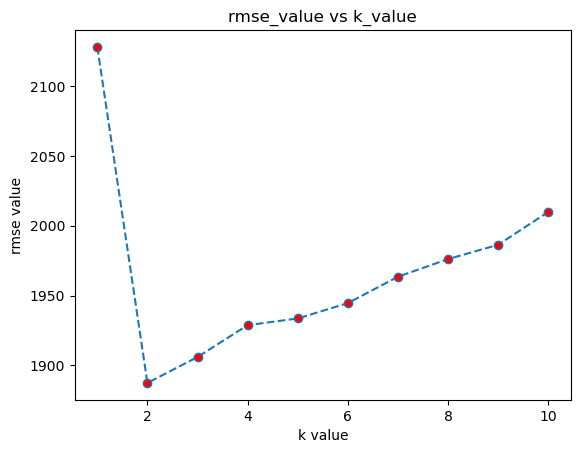

In [611]:
# Let's plot k value and rmse value
plt.plot(range(1,11),rmse_val,linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('rmse_value vs k_value')
plt.xlabel('k value')
plt.ylabel('rmse value')
plt.show()

In [612]:
# fit the data into KNN model
KNN=KNeighborsRegressor(n_neighbors=10)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [613]:
y_predict=KNN.predict(x_test)
y_predict

array([17260.7,  4142.7,  4245. , ..., 10982.1, 11743.5, 10459.4])

In [614]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [615]:
MSE=mean_squared_error(y_test,y_predict)
MSE

4039632.4675059724

In [616]:
RMSE=np.sqrt(MSE)
RMSE

2009.8836950196826

In [617]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

1333.770520783564

In [618]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.7536411211872616

## Support Vector Machine

In [620]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [621]:
y_predict=svr.predict(x_test)
y_predict

array([8247.53627518, 8008.35613406, 7878.37732256, ..., 8506.09496649,
       8444.48027086, 8381.57271484])

In [622]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [623]:
MSE=mean_squared_error(y_test,y_predict)
MSE

15272862.471737474

In [624]:
RMSE=np.sqrt(MSE)
RMSE

3908.050981210132

In [625]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

3241.5091550411025

In [626]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.06857732601565436

### Hyper Parametric Tuning

In [628]:
from itertools import product
param_grid_rbf={'C':[1,10,100],
                'kernel':['rbf'],
                'gamma':['scale','auto']
               }

In [629]:
from sklearn.model_selection import GridSearchCV

In [631]:
model=SVR()
grid=GridSearchCV(model,param_grid=param_grid_rbf,refit=True,scoring='r2',cv=3)
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='r2')

In [633]:
print(grid.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [635]:
y_predict=grid.predict(x_test)
y_predict

array([12896.08848044,  5077.59871309,  4573.0485798 , ...,
        9974.06756567, 11406.11101579, 10662.99668152])

In [637]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [639]:
MSE=mean_squared_error(y_test,y_predict)
MSE

6505822.602701331

In [641]:
RMSE=np.sqrt(MSE)
RMSE

2550.651407523445

In [643]:
MAE=mean_absolute_error(y_predict,y_test)
MAE

1870.4383537747335

In [645]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.6032393602516014

## Decision Tree

In [647]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [649]:
y_predict=DT.predict(x_test)
y_predict

array([14815.,  3873.,  4462., ..., 10262.,  6795., 13377.])

In [651]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [653]:
MSE=mean_squared_error(y_test,y_predict)
MSE

3536932.4479349153

In [655]:
RMSE=np.sqrt(MSE)
RMSE

1880.6734027828743

In [657]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

805.7830068482242

In [659]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.7842985174224016

## Random Forest

In [661]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [663]:
y_predict=RFR.predict(x_test)
y_predict

array([15207.77,  3877.78,  4350.4 , ..., 10373.15,  7169.95, 13224.64])

In [665]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [667]:
MSE=mean_squared_error(y_test,y_predict)
MSE

1940746.6856317897

In [669]:
RMSE=np.sqrt(MSE)
RMSE

1393.1068464521268

In [671]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

698.1663274122358

In [673]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.8816426540340754

## Gradient Boosting

In [675]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [677]:
y_predict=GBR.predict(x_test)
y_predict

array([15354.35461819,  4670.44941721,  4862.20249848, ...,
       10511.22297645, 11005.39759414, 11332.63190266])

In [679]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [681]:
MSE=mean_squared_error(y_test,y_predict)
MSE

3714939.0806513783

In [683]:
RMSE=np.sqrt(MSE)
RMSE

1927.4177234453819

In [685]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

1419.865223951317

In [687]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.7734426995206475

## XG Boost

In [689]:
!pip install xgboost

In [691]:
from xgboost import XGBRegressor
XGBR=XGBRegressor()
XGBR.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [693]:
y_predict=XGBR.predict(x_test)
y_predict

array([18866.453 ,  4147.0024,  4526.758 , ..., 10250.032 ,  8998.753 ,
       12974.584 ], dtype=float32)

In [695]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [697]:
MSE=mean_squared_error(y_test,y_predict)
MSE

1688860.1236898592

In [699]:
RMSE=np.sqrt(MSE)
RMSE

1299.5615120839257

In [701]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

775.4110359961031

In [703]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.8970040678977966

# Model Comparison Report
Among all tested models:

* XGBoost and Random Forest performed the best in terms of r2-score.
* XGBoost and Random Forest are the best models for production.
* Linear Regression has underperformed.

# Challenges Faced:
1. Date and Time Parsing
   * Date_of_Journey, Dep_Time, Arrival_Time are in string formats.

   * Some times have additional info like 01:10 22 Mar, making parsing harder.

   * Need to extract:

        1.Day, month, year

        2.Departure hour, minute

        3.Arrival hour, minute

        4.Duration in minutes
  
2. Route Column Complexity
   * Route has variable-length paths with inconsistent separators.

     Example: "DEL ? LKO ? BOM ? COK"

3. Missing or Uninformative Values
   * Additional_Info is mostly "No info" — not useful as is.

   * May need to drop it or derive something new if patterns exist.
  
4. Categorical Data Encoding
   * Airline, Source, Destination, Total_Stops, etc. are categorical.

   * Need encoding before model use: label encoding or one-hot encoding
  
5. Outliers in Price
   * Price is the target variable but may contain outliers.

   * Need to check for extreme values that could skew the model.